In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datapath = "NASA-promise-dataset-repository-main/kc2.csv"

In [3]:
df=pd.read_csv(datapath)

In [4]:
df = df[~df.isin(['?']).any(axis=1)]

In [5]:
value_map = {"no": 0, "yes": 1}
df['problems'] = df['problems'].replace(value_map)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_2292\2432034615.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['problems'] = df['problems'].replace(value_map)


In [6]:
X =df.drop(["problems"],axis=1)

In [7]:
y = df[["problems"]]

In [8]:
Y_numeric = y.astype(int)

In [9]:
Y_numeric.head()

,problems
0,0
1,1
2,1
3,1
4,1


In [10]:
Y_numeric.values.reshape(1, -1).flatten()

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
Y_numeric[Y_numeric == '?'] = np.nan

In [12]:
X_clean = X[~np.isnan(Y_numeric)]
Y_clean = Y_numeric[~np.isnan(Y_numeric)]

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(Y_numeric)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X_imputed,y_imputed,test_size=0.3,random_state=42)

In [16]:
import tensorflow as tf
from tensorflow.keras import __version__

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {__version__}")

TensorFlow Version: 2.16.1
Keras Version: 3.3.3


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(LSTM(64, input_shape=(10, 1)))
# model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamW', metrics=['accuracy'])

x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

model.fit(x_train, y_train, batch_size=16, epochs=200)

loss, accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {accuracy}")

C:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5609 - loss: 0.6391
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7824 - loss: 0.4230
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8144 - loss: 0.3599
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8211 - loss: 0.3773
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8341 - loss: 0.3372
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8210 - loss: 0.3434
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8099 - loss: 0.3354
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8142 - loss: 0.3456
Epoch 9/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8356 - loss: 0.3458
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8608 - loss: 0.3525
Epoch 11/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8383 - loss: 0.3322
Epoch 12/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accurac

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[115  11]
 [ 18  13]]


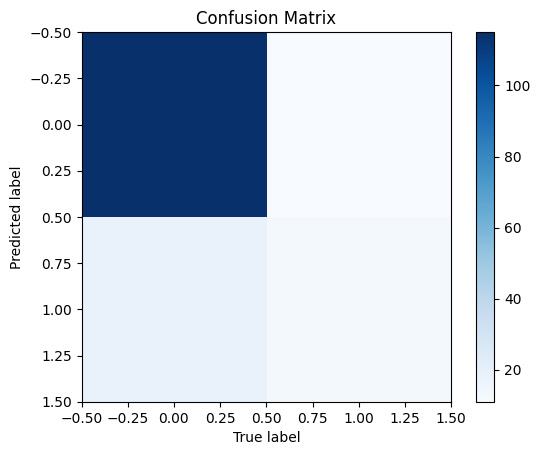

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Calculate confusion matrix
y_pred = model.predict(x_test)
y_pred = tf.round(y_pred).numpy()
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [24]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       126
         1.0       0.54      0.42      0.47        31

    accuracy                           0.82       157
   macro avg       0.70      0.67      0.68       157
weighted avg       0.80      0.82      0.81       157



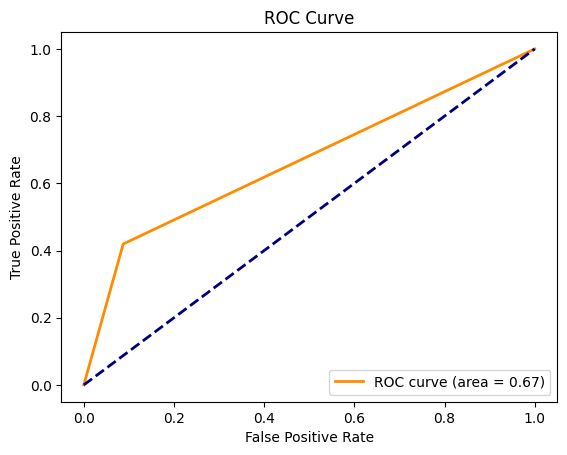

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

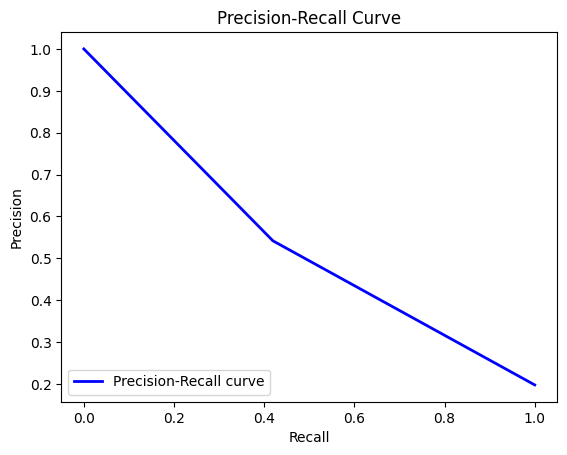

In [26]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()